# 1️⃣ **Text Input Section**

github repo: https://github.com/shaahdmaansour/TuneTone.git

In [3]:
print("📄 Interactive Text Analysis Tool\n")
user_text = input("✏️ Enter your text for analysis:\n\n")
print(f"\n🧾 Word count: {len(user_text.split())}, Character count: {len(user_text)}")

📄 Interactive Text Analysis Tool

✏️ Enter your text for analysis:

hey this is shahd's project

🧾 Word count: 5, Character count: 27


# 2️⃣ **Grammar & Style Correction**

In [4]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "vennify/t5-base-grammar-correction"
tokenizer_gc = AutoTokenizer.from_pretrained(model_name)
model_gc = AutoModelForSeq2SeqLM.from_pretrained(model_name)

def correct_grammar_t5(text):
    input_text = "gec: " + text
    inputs = tokenizer_gc.encode(input_text, return_tensors="pt", max_length=512, truncation=True)
    outputs = model_gc.generate(inputs, max_length=512, num_beams=5, early_stopping=True)
    return tokenizer_gc.decode(outputs[0], skip_special_tokens=True)

corrected_text = correct_grammar_t5(user_text)
print("\n✅ Corrected Version:\n", corrected_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



✅ Corrected Version:
 Hey, this is shahd's project.


# 3️⃣ **Sentiment & Tone Detection**

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

model_id = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer_sent = AutoTokenizer.from_pretrained(model_id)
model_sent = AutoModelForSequenceClassification.from_pretrained(model_id)

def detect_sentiment(text):
    encoded_input = tokenizer_sent(text, return_tensors='pt', truncation=True)
    output = model_sent(**encoded_input)
    scores = torch.nn.functional.softmax(output.logits, dim=1).detach().numpy()[0]
    labels = ['Negative', 'Neutral', 'Positive']
    result = dict(zip(labels, scores))
    return max(result, key=result.get), result

label, probs = detect_sentiment(user_text)
print(f"\n🎭 Sentiment: {label}")
print("📊 Scores:", probs)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



🎭 Sentiment: Neutral
📊 Scores: {'Negative': np.float32(0.026425052), 'Neutral': np.float32(0.8663107), 'Positive': np.float32(0.10726427)}


# 4️⃣ **Readability Scoring**

In [6]:
import textstat

print("\n📚 Readability Analysis:")
print("Flesch Reading Ease:", textstat.flesch_reading_ease(user_text))
print("Grade Level:", textstat.text_standard(user_text))
print("Difficult Words:", textstat.difficult_words(user_text))


📚 Readability Analysis:
Flesch Reading Ease: 100.24000000000002
Grade Level: 1st and 2nd grade
Difficult Words: 1


# 5️⃣ **Semantic Plagiarism Detection**

In [7]:
from sentence_transformers import SentenceTransformer, util

# Sample source texts (can be extended to 100s of sources from file)
known_sources = [
    "Machine learning is a subset of artificial intelligence that enables computers to learn from data.",
    "Global warming refers to the long-term rise in the average temperature of the Earth's climate system.",
    "The internet has revolutionized communication by allowing instant sharing of information across the world."
]

model_semantic = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Compare each known sentence with user text
user_emb = model_semantic.encode(user_text, convert_to_tensor=True)
similarities = [util.pytorch_cos_sim(user_emb, model_semantic.encode(src, convert_to_tensor=True)).item() for src in known_sources]

print("\n🔍 Plagiarism Similarity Check (Semantic):")
for i, sim in enumerate(similarities):
    print(f"Source {i+1}: Similarity Score = {sim:.2f}")
    if sim > 0.8:
        print("⚠️ Likely Copied or Paraphrased\n")
    elif sim > 0.5:
        print("⚠️ Possibly Referenced\n")
    else:
        print("✅ Low similarity\n")


🔍 Plagiarism Similarity Check (Semantic):
Source 1: Similarity Score = 0.03
✅ Low similarity

Source 2: Similarity Score = 0.03
✅ Low similarity

Source 3: Similarity Score = 0.09
✅ Low similarity



# 6️⃣ **Citation Detection**

In [8]:
import re

def detect_citations(text):
    patterns = [r"\baccording to\b", r"\bstudies show\b", r"\bwas found that\b", r"\bevidence\b", r"\bin a study\b"]
    sentences = re.split(r'(?<=[.!?])\s+', text)
    return [s for s in sentences if any(re.search(p, s, re.IGNORECASE) for p in patterns)]

print("\n📎 Citation Needed:")
for sent in detect_citations(user_text):
    print("🔖", sent)


📎 Citation Needed:


# 7️⃣ **Text-to-Speech**

In [9]:
from gtts import gTTS
from IPython.display import Audio

tts = gTTS(corrected_text)
tts.save("corrected_output.mp3")
print("\n🔊 Playing corrected version aloud:")
Audio("corrected_output.mp3")


🔊 Playing corrected version aloud:


# 8️⃣ **Visualizing Document Flow**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128196 (\N{PAGE FACING UP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


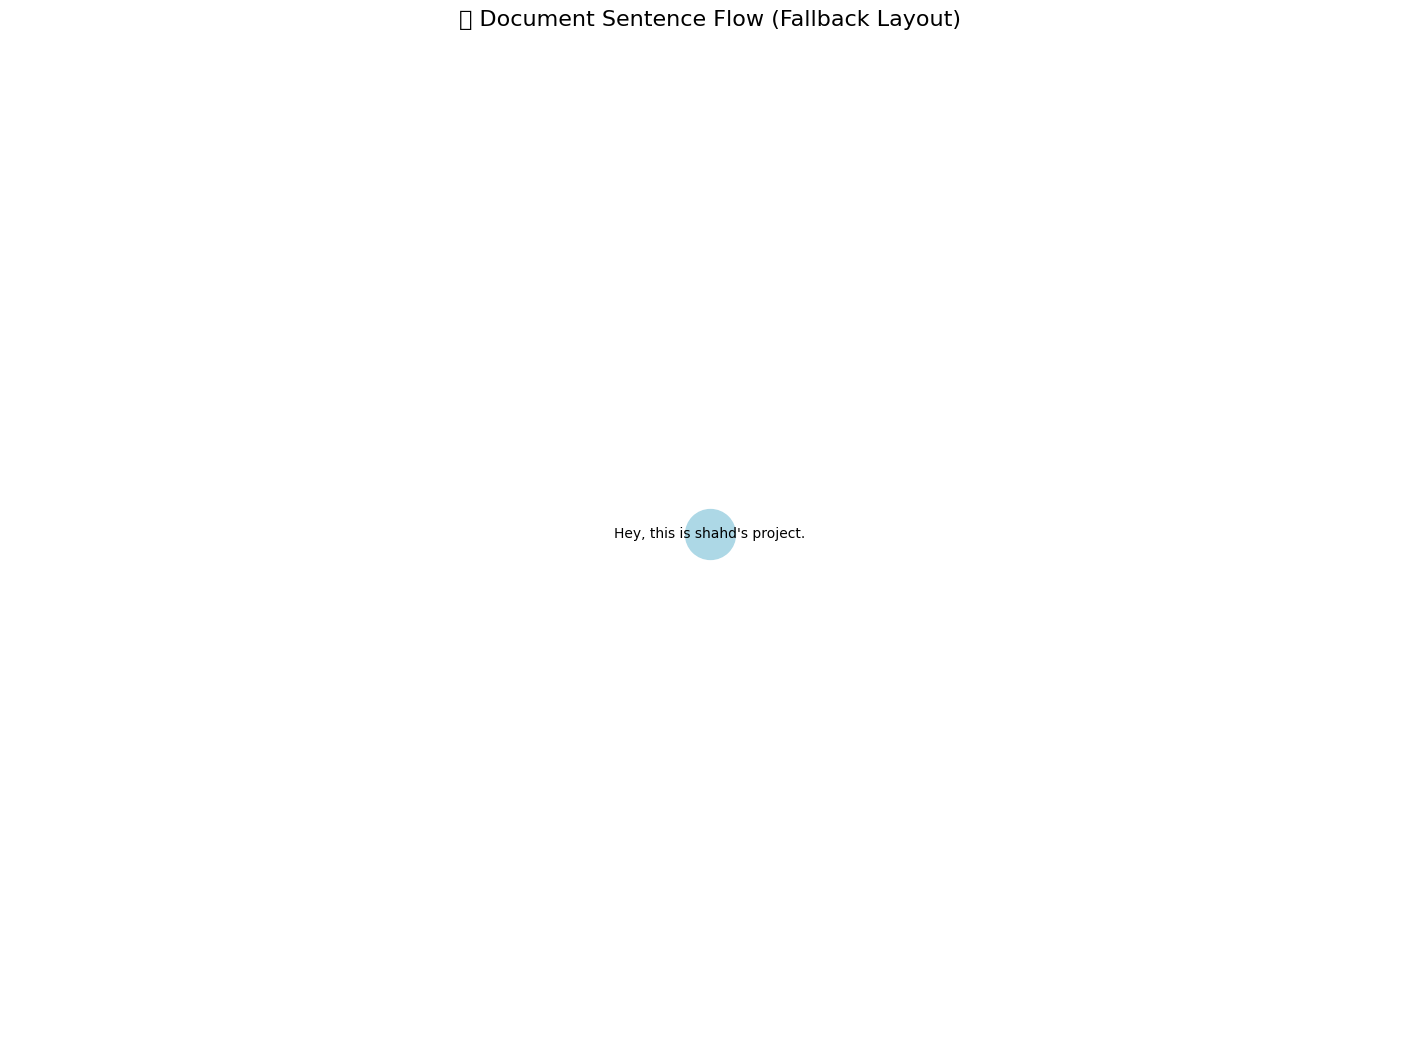

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import re
import textwrap

def visualize_fallback_flow(text, max_label_len=60):
    sentences = re.split(r'(?<=[.!?])\s+', text.strip())
    G = nx.DiGraph()

    for i, sent in enumerate(sentences):
        if sent.strip():
            label = textwrap.fill(sent.strip(), width=max_label_len)
            G.add_node(i, label=label, size=len(sent))
            if i > 0:
                G.add_edge(i-1, i)

    pos = nx.spring_layout(G, k=0.8, iterations=100)
    labels = nx.get_node_attributes(G, 'label')
    sizes = [1000 + G.nodes[n]['size']*10 for n in G.nodes]

    plt.figure(figsize=(14, 10))
    nx.draw(
        G, pos,
        labels=labels,
        with_labels=True,
        node_size=sizes,
        node_color='lightblue',
        edge_color='gray',
        font_size=10,
        arrows=True
    )
    plt.title("📄 Document Sentence Flow (Fallback Layout)", fontsize=16)
    plt.axis('off')
    plt.show()

# Call it
visualize_fallback_flow(corrected_text)